In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df=pd.read_csv('/content/sample_data/kyphosis.csv')

In [41]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [43]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [44]:
kyphosis_=pd.get_dummies(df['Kyphosis'],drop_first=True)

In [45]:
kyphosis_.head()

,present
0,False
1,False
2,True
3,False
4,False


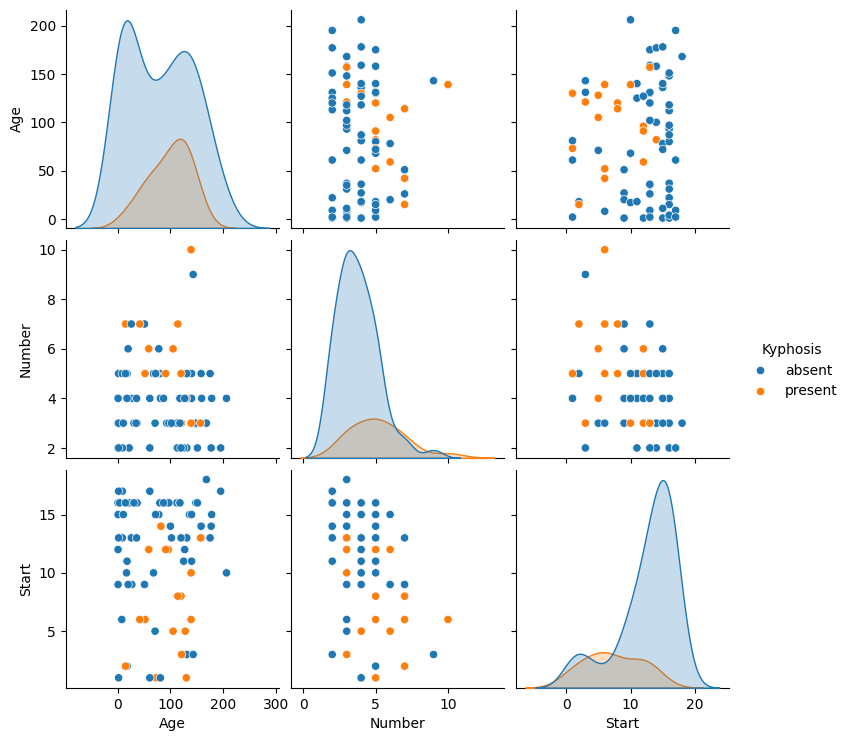

In [46]:
sns.pairplot(df,hue='Kyphosis')

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtree=DecisionTreeClassifier()

In [51]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
predictions=dtree.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix,classification_report

In [54]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[17  6]
 [ 1  1]]
              precision    recall  f1-score   support

      absent       0.94      0.74      0.83        23
     present       0.14      0.50      0.22         2

    accuracy                           0.72        25
   macro avg       0.54      0.62      0.53        25
weighted avg       0.88      0.72      0.78        25



# Tree Visualizzation

In [55]:
!pip install -q pydot

In [56]:
from IPython.display import Image
# from sklearn.externals.six import StringIO
from io import StringIO
from sklearn.tree import export_graphviz
import pydot


In [57]:
df.columns[1:]


Index(['Age', 'Number', 'Start'], dtype='object')

In [58]:
features=list(df.columns[1:])
features

['Age', 'Number', 'Start']

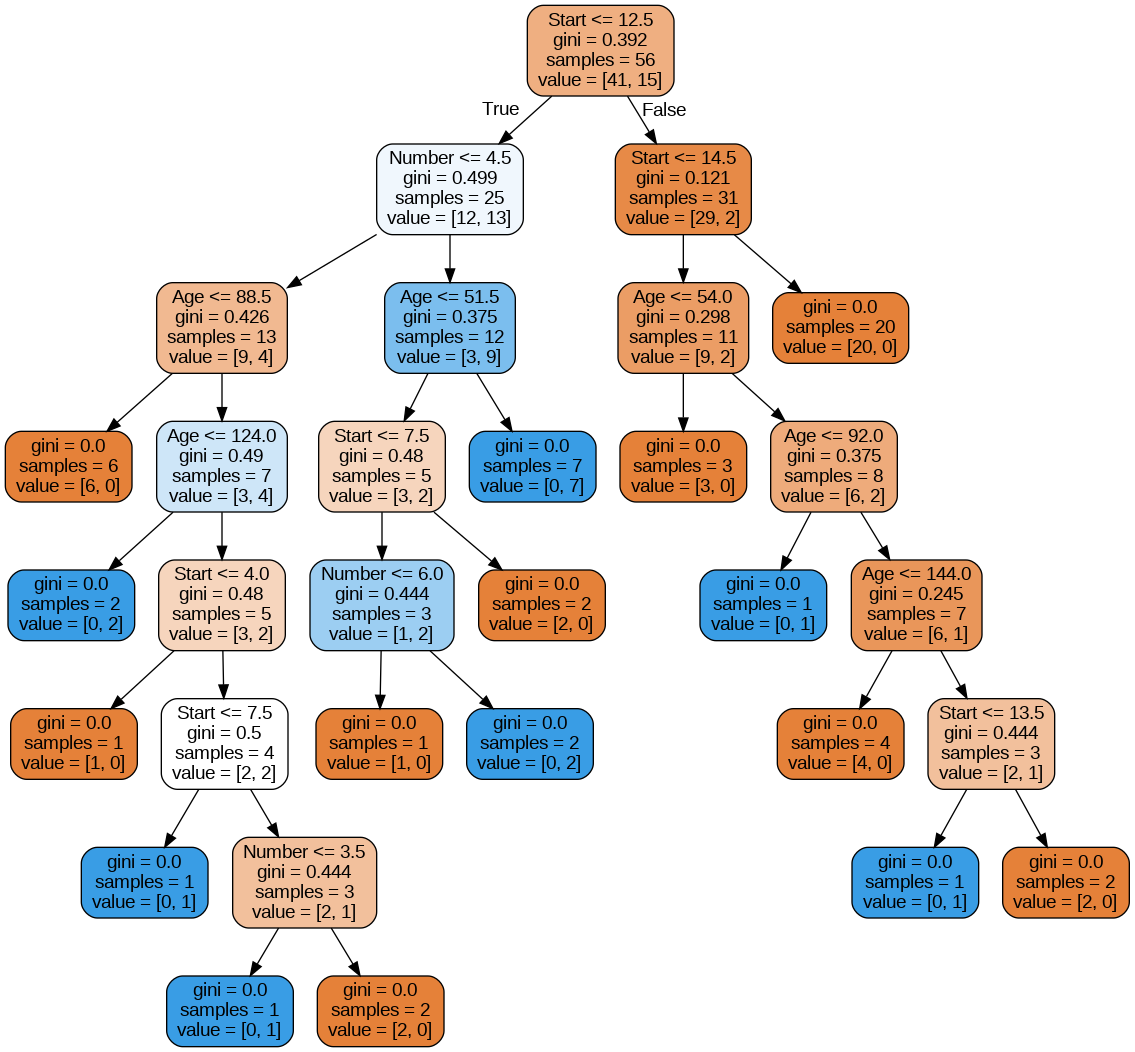

In [59]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [61]:
rfc_pred=rfc.predict(X_test)

In [62]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[22  1]
 [ 2  0]]


              precision    recall  f1-score   support

      absent       0.92      0.96      0.94        23
     present       0.00      0.00      0.00         2

    accuracy                           0.88        25
   macro avg       0.46      0.48      0.47        25
weighted avg       0.84      0.88      0.86        25



In [63]:
df['Kyphosis'].value_counts()

,count
Kyphosis,
absent,64
present,17


In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
df=pd.read_csv('/content/sample_data/loan_data.csv')

In [66]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [68]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory DAta Analysis

Text(0.5, 0, 'FICO Score')

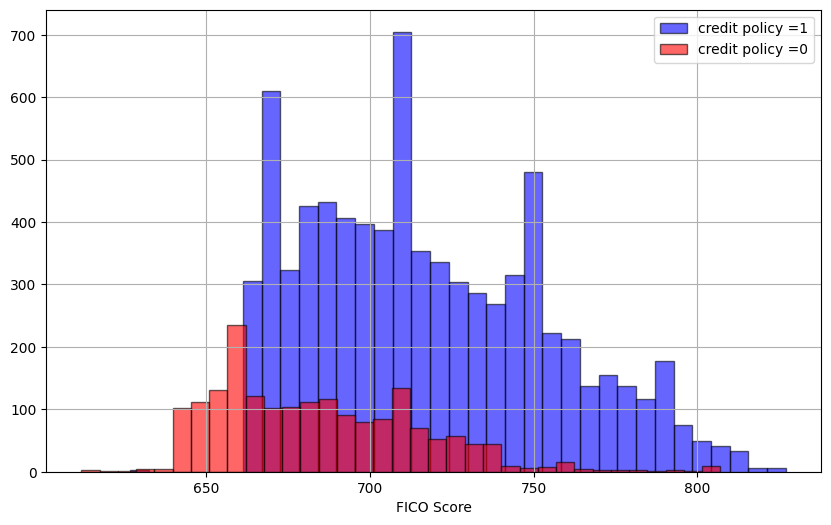

In [96]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(bins=35,color='blue',edgecolor='black',alpha=0.6
                                        ,label='credit policy =1')
df[df['credit.policy']==0]['fico'].hist(bins=35,color='red',edgecolor='black',alpha=0.6,
                                       label='credit policy =0')
plt.legend()
# Adding labels and title
# plt.title('FICO Scores for Credit Policy == 0', fontsize=10)
plt.xlabel('FICO Score', fontsize=10)
# plt.ylabel('Frequency', fontsize=12)

Cut off point is for people with FICO score less than 660, will automatically not meet the credit underrating criteria

In [100]:
df['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,1533


Text(0.5, 0, 'FICO Score')

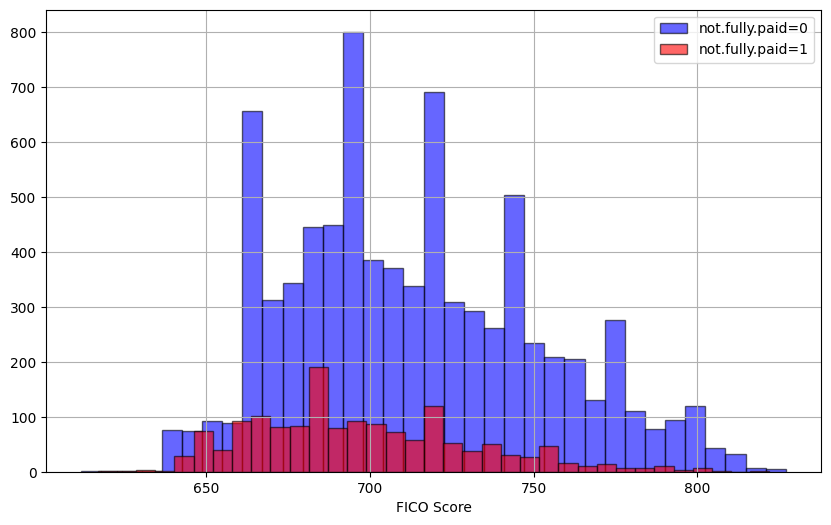

In [110]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==0]['fico'].hist(bins=35,color='blue',alpha=0.6
                                         ,edgecolor='black',label='not.fully.paid=0')
df[df['not.fully.paid']==1]['fico'].hist(bins=35,color='red',edgecolor='black',alpha=0.6,
                                       label='not.fully.paid=1')
plt.legend()
plt.xlabel('FICO Score', fontsize=10)

<Axes: xlabel='not.fully.paid', ylabel='count'>

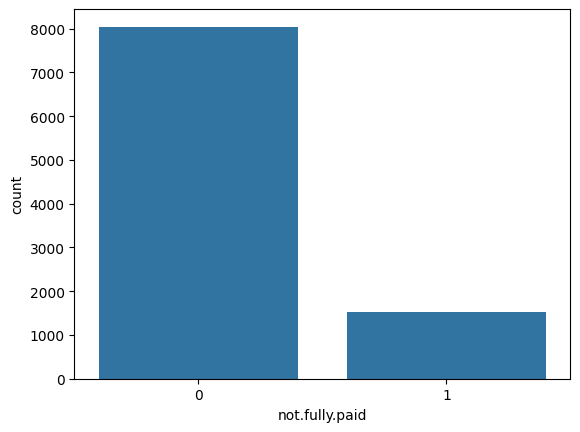

In [111]:
sns.countplot(df,x='not.fully.paid')

<Axes: xlabel='purpose', ylabel='count'>

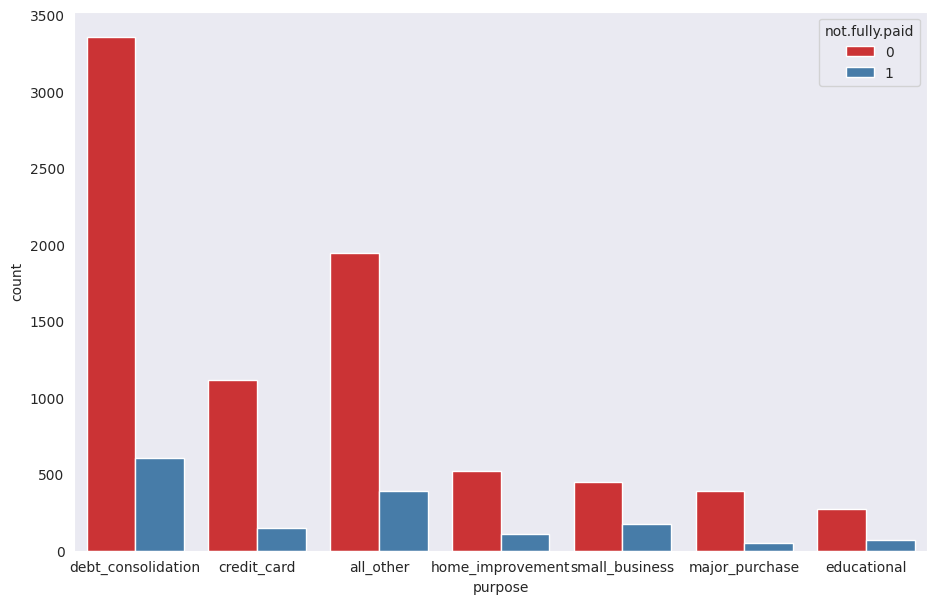

In [117]:
sns.set_style('dark')
plt.figure(figsize=(11,7))
sns.countplot(df,x='purpose',hue='not.fully.paid',palette='Set1')

### Trend between FICO scroe and interest rate

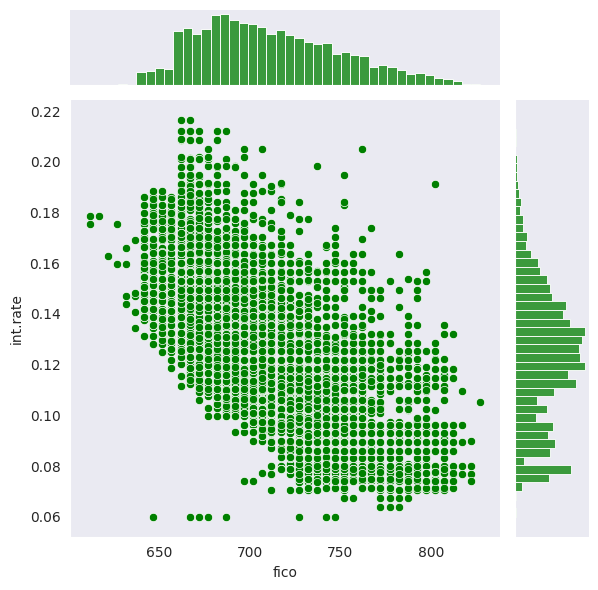

In [123]:
sns.jointplot(data=df,x='fico',y='int.rate',color='green')

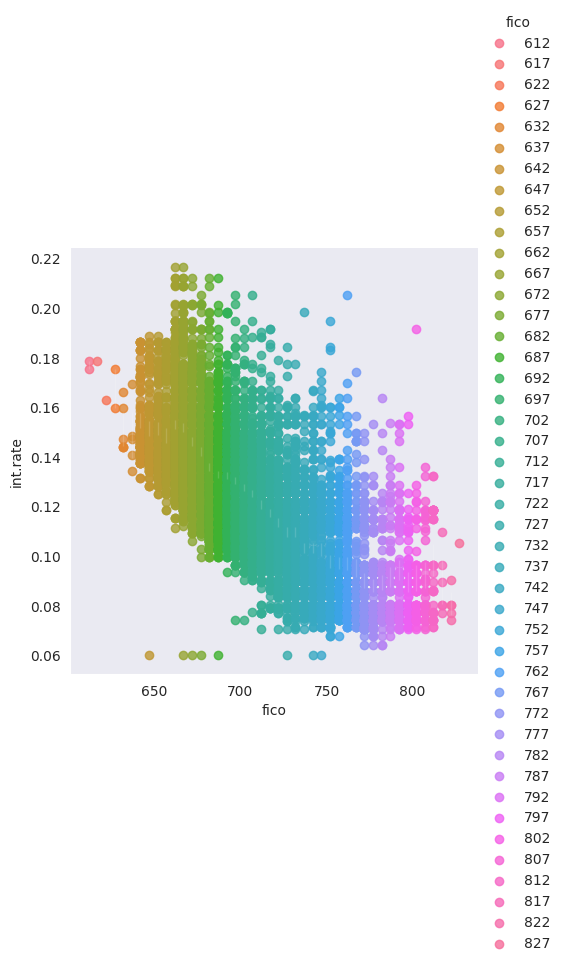

In [131]:
sns.lmplot(df,x='fico',y='int.rate',hue='fico')

<Figure size 1100x700 with 0 Axes>

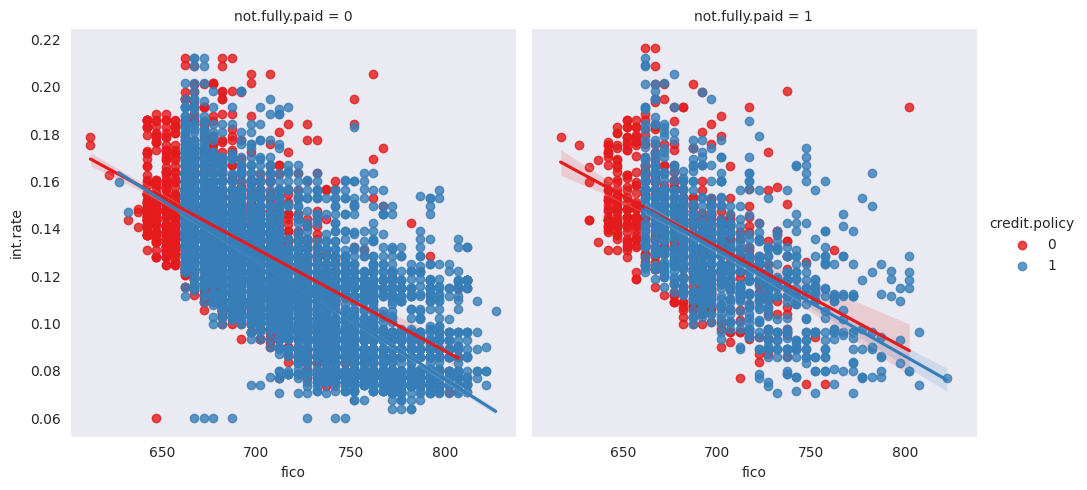

In [134]:
plt.figure(figsize=(11,7))
sns.lmplot(df,x='fico',y='int.rate',hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [169]:
cat_feats=['purpose']

In [170]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [171]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [137]:
# purpose_modified=pd.get_dummies(df['purpose'],drop_first=True)
# purpose_modified.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,False,True,False,False,False,False
1,True,False,False,False,False,False
2,False,True,False,False,False,False
3,False,True,False,False,False,False
4,True,False,False,False,False,False


In [145]:
# purpose_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   credit_card         9578 non-null   bool 
 1   debt_consolidation  9578 non-null   bool 
 2   educational         9578 non-null   bool 
 3   home_improvement    9578 non-null   bool 
 4   major_purchase      9578 non-null   bool 
 5   small_business      9578 non-null   bool 
dtypes: bool(6)
memory usage: 56.2 KB


In [146]:
# final_data=pd.concat([df,purpose_modified],axis=1)

In [147]:
# final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit.policy       9578 non-null   int64  
 1   purpose             9578 non-null   object 
 2   int.rate            9578 non-null   float64
 3   installment         9578 non-null   float64
 4   log.annual.inc      9578 non-null   float64
 5   dti                 9578 non-null   float64
 6   fico                9578 non-null   int64  
 7   days.with.cr.line   9578 non-null   float64
 8   revol.bal           9578 non-null   int64  
 9   revol.util          9578 non-null   float64
 10  inq.last.6mths      9578 non-null   int64  
 11  delinq.2yrs         9578 non-null   int64  
 12  pub.rec             9578 non-null   int64  
 13  not.fully.paid      9578 non-null   int64  
 14  credit_card         9578 non-null   bool   
 15  debt_consolidation  9578 non-null   bool   
 16  educat

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [174]:
from sklearn.tree import DecisionTreeClassifier

In [175]:
dtree=DecisionTreeClassifier()

In [176]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [183]:
predictss=dtree.predict(X_test)

In [178]:
from sklearn.metrics import confusion_matrix,classification_report

In [184]:
print(confusion_matrix(y_test,predictss))
print('\n')
print(classification_report(y_test,predictss))

[[2004  427]
 [ 343  100]]


              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



### Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
rfc=RandomForestClassifier(n_estimators=300)

In [182]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [185]:
predict=rfc.predict(X_test)

In [186]:
print(confusion_matrix(y_test,predict))
print('\n')
print(classification_report(y_test,predict))

[[2422    9]
 [ 434    9]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874

